In [132]:
# import the necessary libraries

import pandas as pd
import numpy as np 
import seaborn as sns
sns.set_style('whitegrid')

from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
%matplotlib inline 


import mplcyberpunk 
plt.style.use("cyberpunk")

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn import preprocessing

In [133]:
df = pd.read_csv('Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Print statistical metrics

In [134]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


### Check the data types

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [136]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

### Check for null values

In [137]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

### EDA & Visualizations

In [138]:
df.WeekStatus.unique()

array(['Weekday', 'Weekend'], dtype=object)

<AxesSubplot:xlabel='WeekStatus', ylabel='count'>

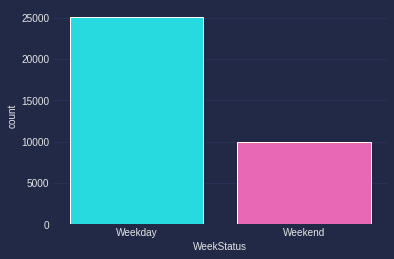

In [139]:
sns.countplot('WeekStatus', data=df )

<AxesSubplot:xlabel='Load_Type', ylabel='count'>

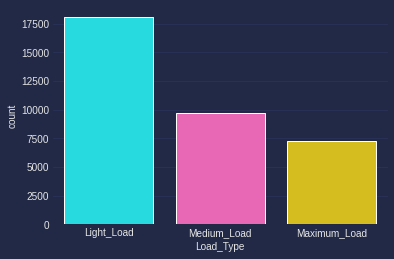

In [140]:
sns.countplot('Load_Type', data=df)

In [141]:
df['Months']=pd.to_datetime(df['date'],format="%d/%m/%Y %H:%M").dt.month # convert to date format
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Months
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,1


In [142]:
df.Months.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Text(0.5, 1.0, 'Load type by month')

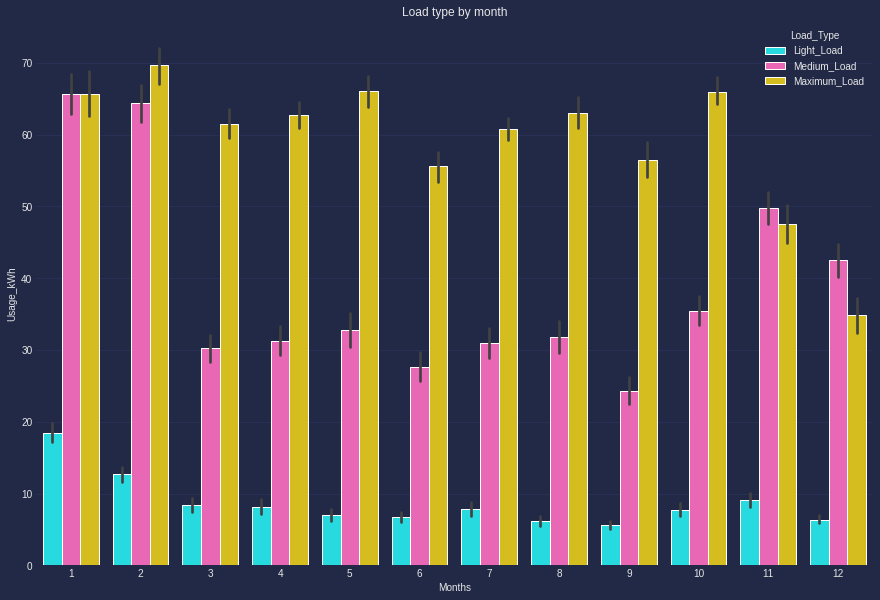

In [143]:
plt.subplots(figsize=(15,10))
sns.barplot(data=df, x='Months', y='Usage_kWh', hue="Load_Type")
plt.title('Load type by month')


<AxesSubplot:xlabel='Day_of_week', ylabel='Usage_kWh'>

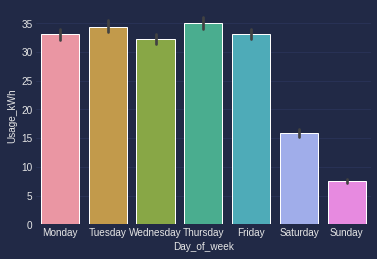

In [144]:
sns.barplot(data=df, x='Day_of_week', y='Usage_kWh')


<AxesSubplot:xlabel='Day_of_week', ylabel='Leading_Current_Reactive_Power_kVarh'>

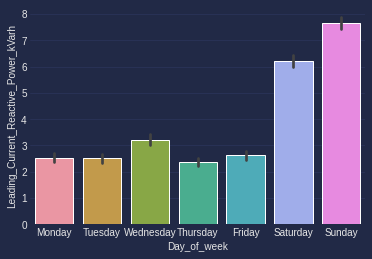

In [145]:
sns.barplot(data=df, x='Day_of_week', y='Leading_Current_Reactive_Power_kVarh')


<AxesSubplot:xlabel='Day_of_week', ylabel='Lagging_Current_Power_Factor'>

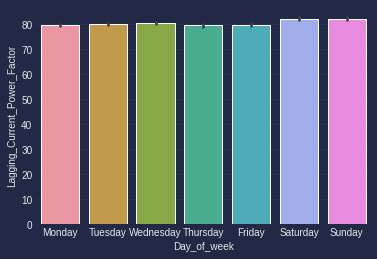

In [146]:
sns.barplot(data=df, x='Day_of_week', y='Lagging_Current_Power_Factor')

Text(0.5, 1.0, 'CO2 emissions by month')

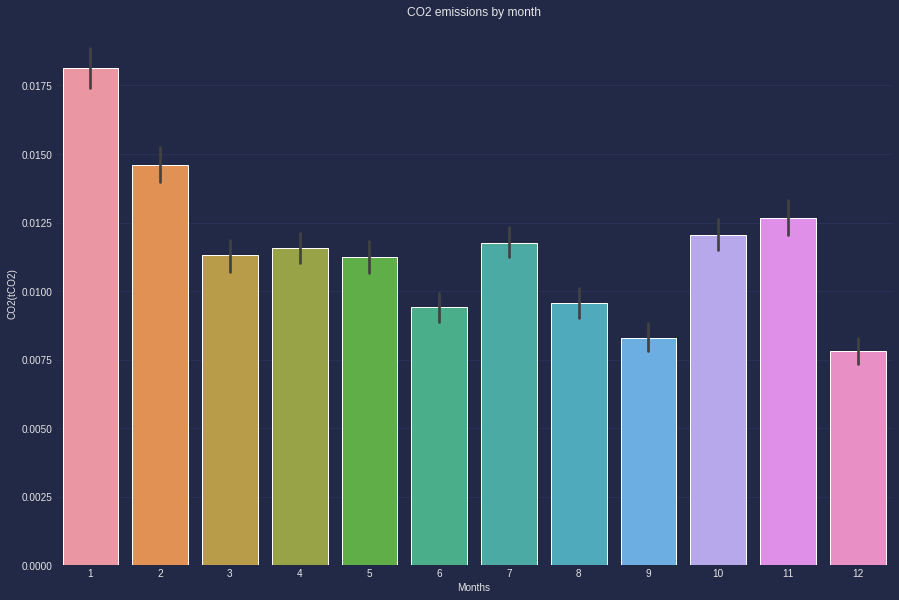

In [147]:
plt.subplots(figsize=(15,10))
sns.barplot(data=df, x='Months', y='CO2(tCO2)')
plt.title('CO2 emissions by month')

Text(0.5, 1.0, 'Energy consupmtion by month & by day ')

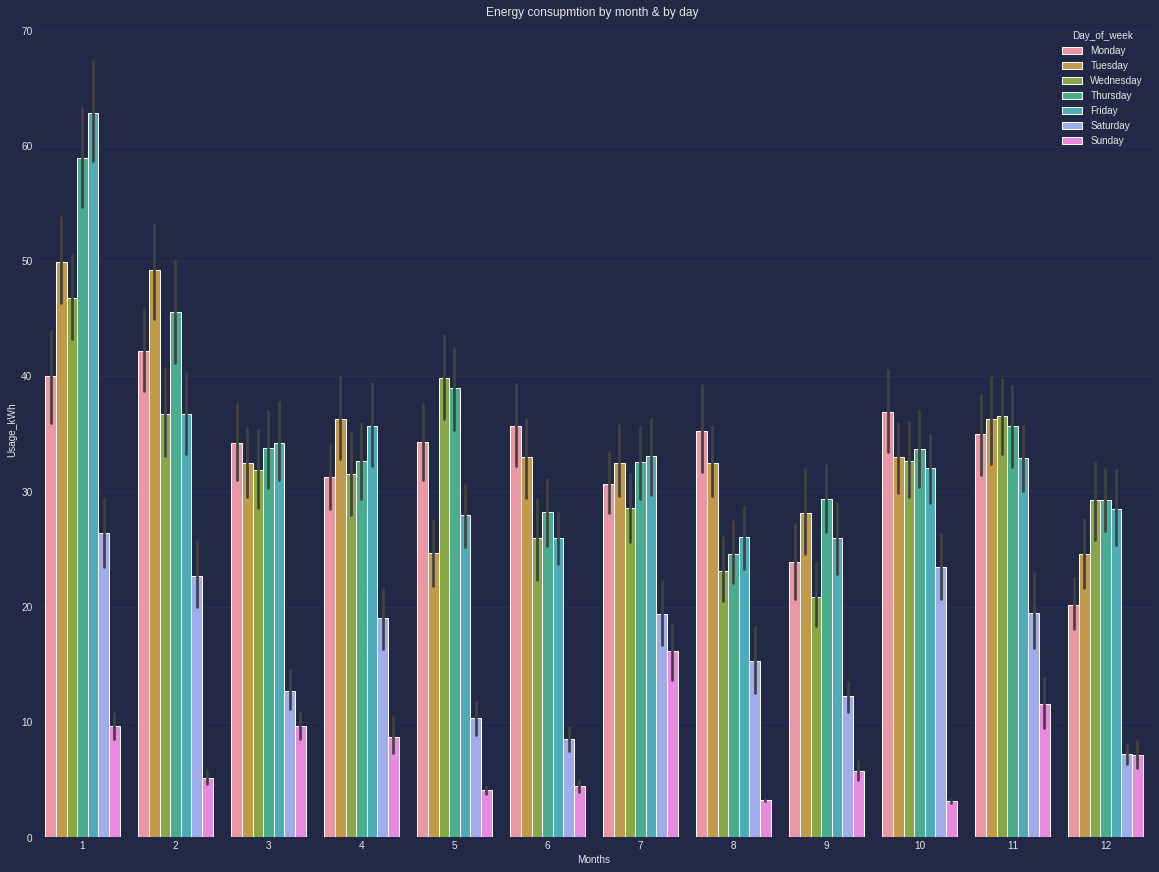

In [148]:
plt.subplots(figsize=(20,15))
sns.barplot(data=df, x='Months', y='Usage_kWh', hue='Day_of_week')
plt.title('Energy consupmtion by month & by day ')

In [149]:
df['date-time'] = pd.to_datetime(df['date'])

In [150]:
df['day'] = pd.DatetimeIndex(df['date-time']).day
df['year'] = pd.DatetimeIndex(df['date-time']).year
df['hour'] = pd.DatetimeIndex(df['date-time']).hour
df['minute'] = pd.DatetimeIndex(df['date-time']).minute

In [151]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Months,date-time,day,year,hour,minute
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load,1,2018-01-01 00:15:00,1,2018,0,15
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load,1,2018-01-01 00:30:00,1,2018,0,30
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load,1,2018-01-01 00:45:00,1,2018,0,45
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load,1,2018-01-01 01:00:00,1,2018,1,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load,1,2018-01-01 01:15:00,1,2018,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load,12,2018-12-31 23:00:00,31,2018,23,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load,12,2018-12-31 23:15:00,31,2018,23,15
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load,12,2018-12-31 23:30:00,31,2018,23,30
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load,12,2018-12-31 23:45:00,31,2018,23,45


In [152]:
df.Day_of_week.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [153]:
le = preprocessing.LabelEncoder()

In [154]:
df["Day_of_week"] = le.fit_transform(df["Day_of_week"]) # Variable transformation

In [155]:
df.Day_of_week.unique()

array([1, 5, 6, 4, 0, 2, 3])

In [156]:

date_times_var = ['year', 'Months', 'day', 'hour', 'minute'] 

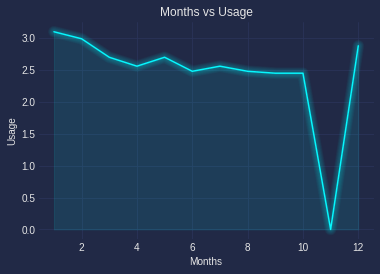

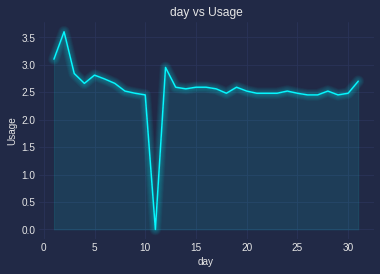

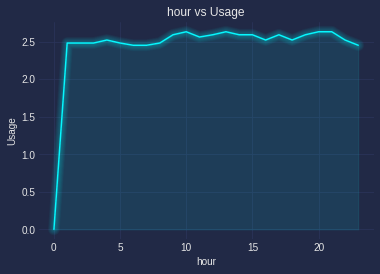

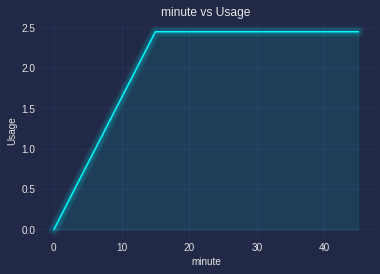

In [157]:
for feature in date_times_var:
    if feature == 'year':
        continue
    data = df.copy()
    data.groupby(feature)['Usage_kWh'].min().plot()
    plt.xlabel(feature)
    plt.ylabel('Usage')
    plt.title(str(feature) + " vs Usage")
    mplcyberpunk.add_glow_effects()
    plt.show()

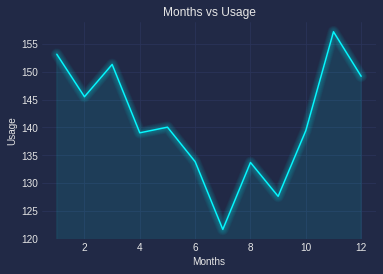

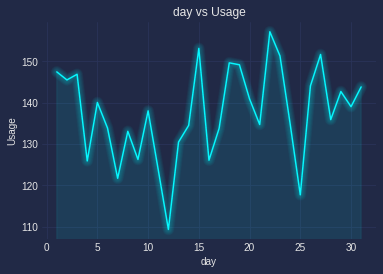

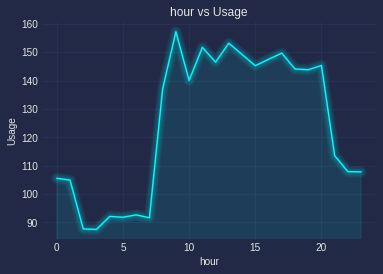

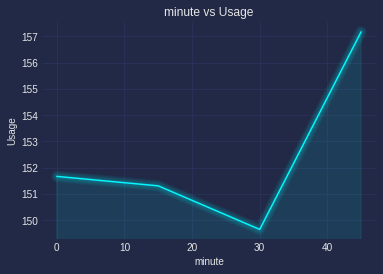

In [158]:
for feature in date_times_var:
    if feature == 'year':
        continue
    data = df.copy()
    data.groupby(feature)['Usage_kWh'].max().plot()
    plt.xlabel(feature)
    plt.ylabel('Usage')
    plt.title(str(feature) + " vs Usage")
    mplcyberpunk.add_glow_effects()
    plt.show()

Text(0.5, 1.0, 'LCRP vs Usage kWh vs Load Type')

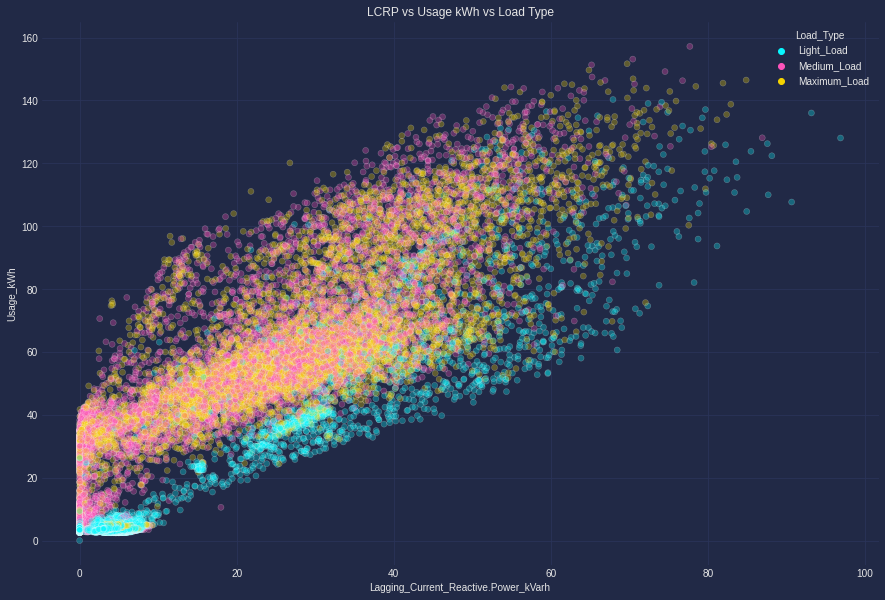

In [159]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',hue='Load_Type', alpha=0.3, data=df)
plt.title('LCRP vs Usage kWh vs Load Type')

Text(0.5, 1.0, 'LagCRP vs Usage kWh')

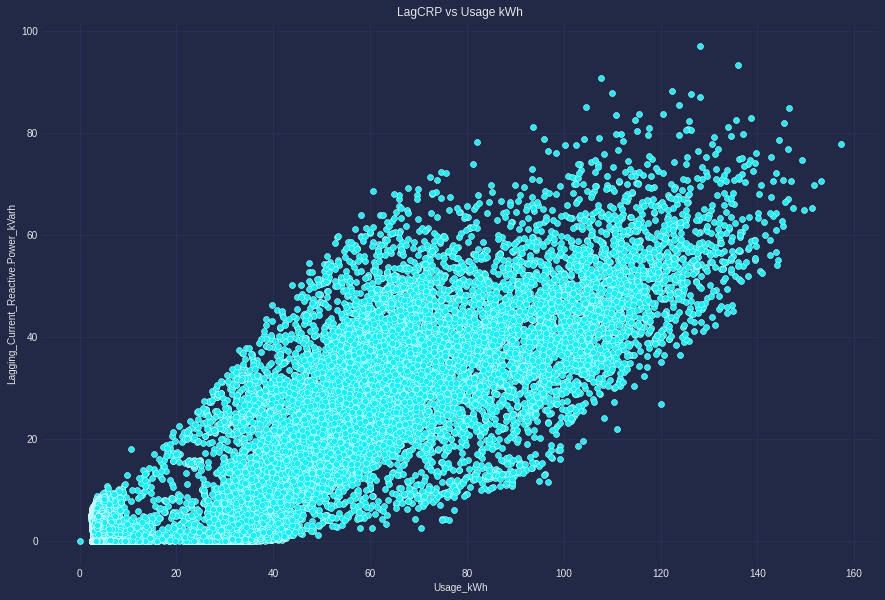

In [160]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x='Usage_kWh',y='Lagging_Current_Reactive.Power_kVarh', data=df)
plt.title('LagCRP vs Usage kWh')

Text(0.5, 1.0, 'LeadCRP vs Usage kWh')

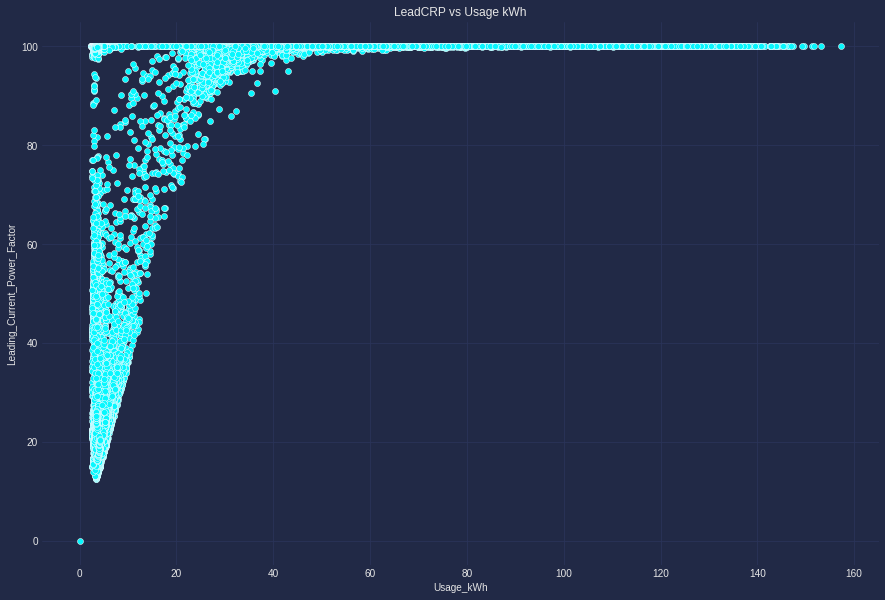

In [161]:
plt.subplots(figsize=(15,10))
sns.scatterplot(x='Usage_kWh',y='Leading_Current_Power_Factor', data=df)
plt.title('LeadCRP vs Usage kWh')



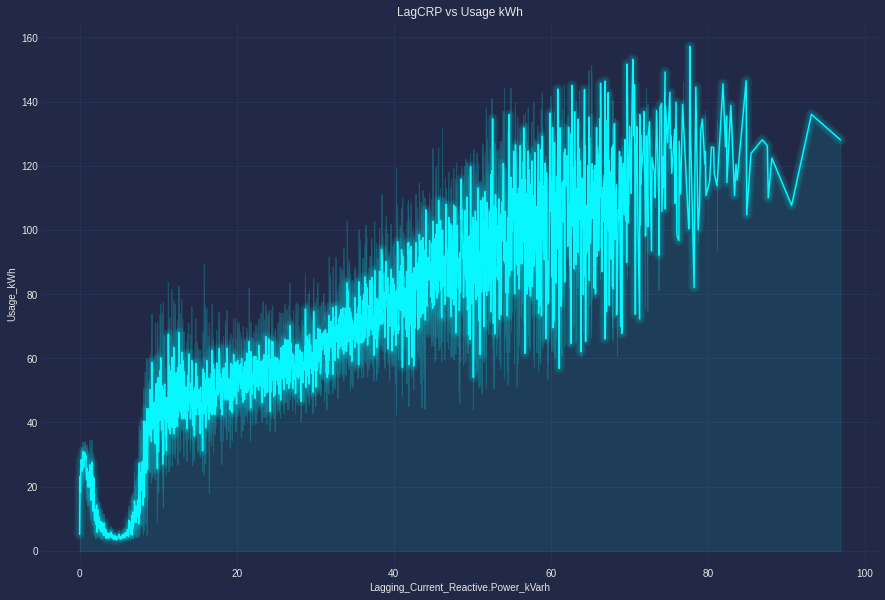

In [162]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='Lagging_Current_Reactive.Power_kVarh',y='Usage_kWh',data=df)
mplcyberpunk.add_glow_effects()
plt.title('LagCRP vs Usage kWh')
plt.show()

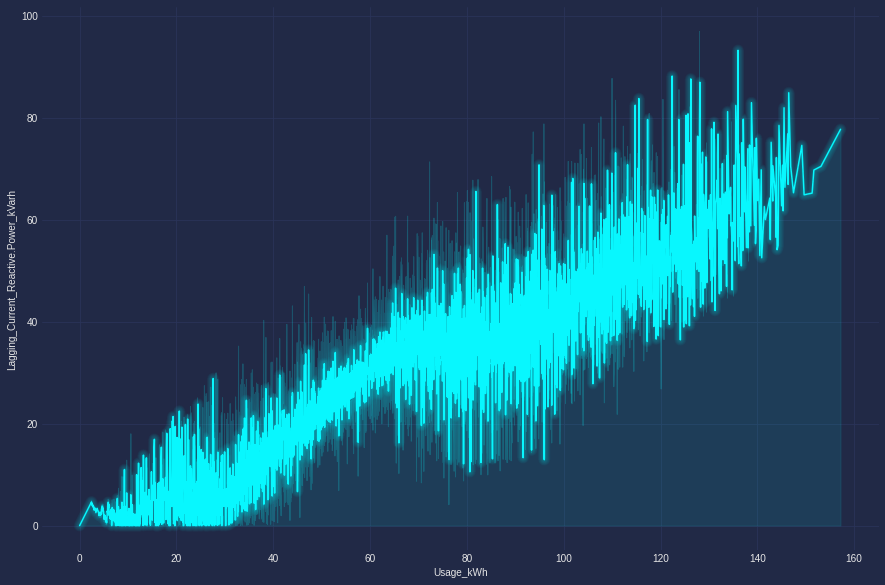

In [163]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='Usage_kWh',y='Lagging_Current_Reactive.Power_kVarh',data=df)
mplcyberpunk.add_glow_effects()
plt.show()

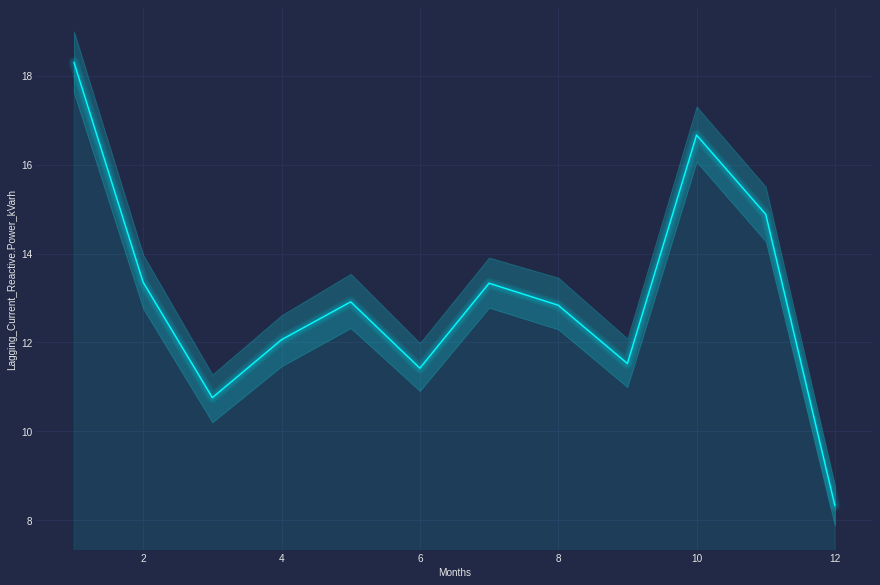

In [164]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='Months',y='Lagging_Current_Reactive.Power_kVarh', data=df)
mplcyberpunk.add_glow_effects()
plt.show()

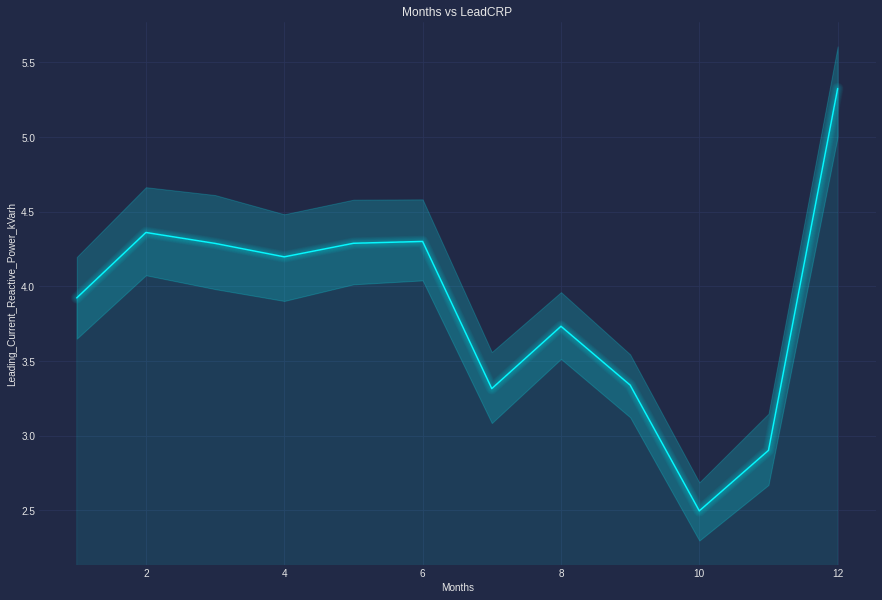

In [165]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='Months',y='Leading_Current_Reactive_Power_kVarh', data=df)
mplcyberpunk.add_glow_effects()
plt.title('Months vs LeadCRP')
plt.show()

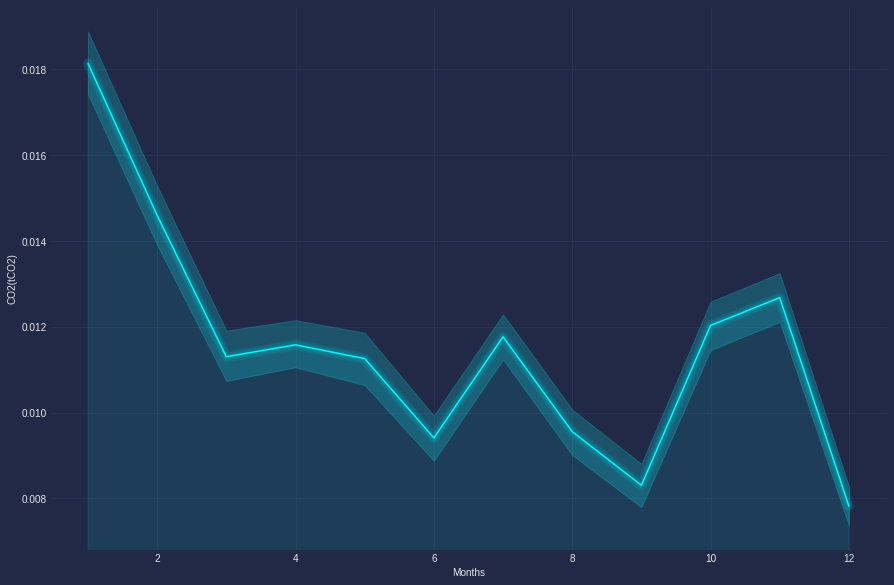

In [166]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='Months',y='CO2(tCO2)', data=df)
mplcyberpunk.add_glow_effects()
plt.show()

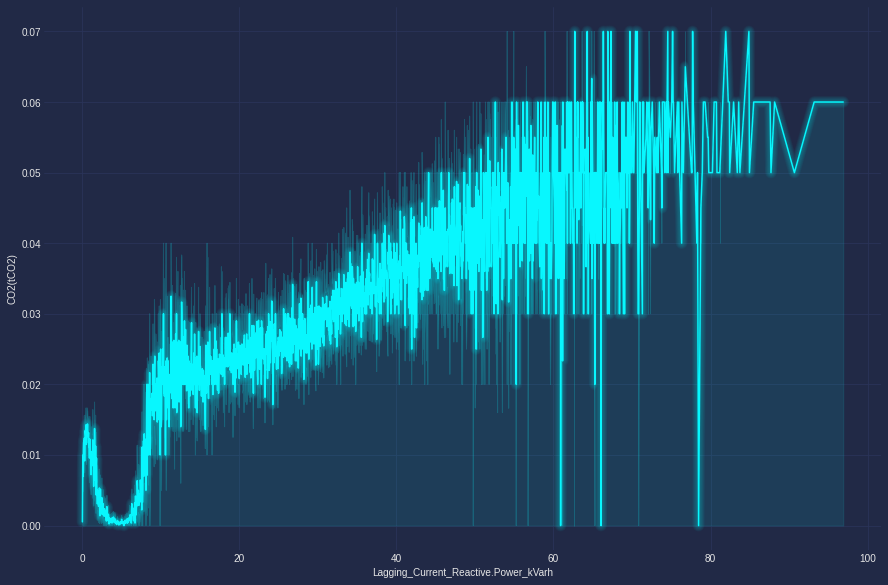

In [167]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='Lagging_Current_Reactive.Power_kVarh',y='CO2(tCO2)',data=df)
mplcyberpunk.add_glow_effects()
plt.show()

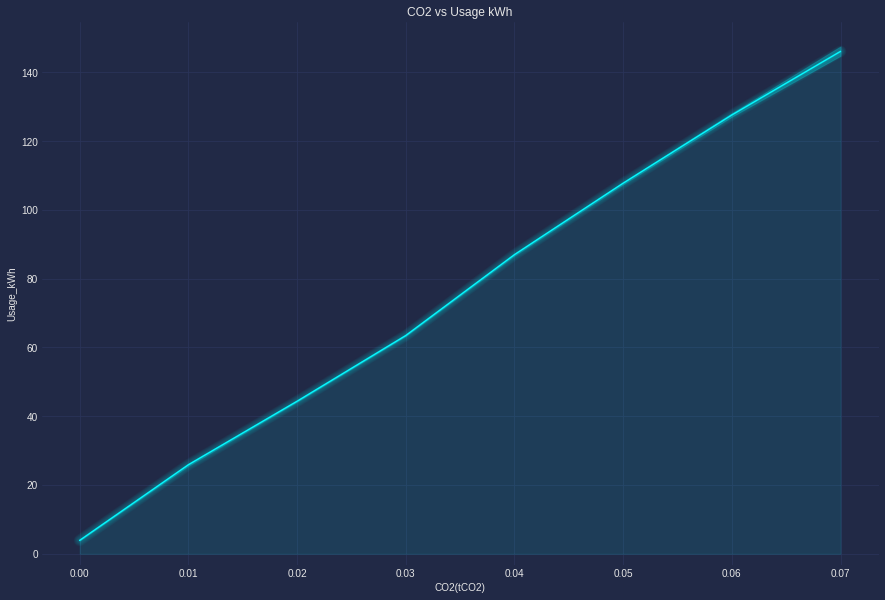

In [168]:
plt.subplots(figsize=(15,10))
sns.lineplot(x='CO2(tCO2)',y='Usage_kWh',data=df)
mplcyberpunk.add_glow_effects()
plt.title('CO2 vs Usage kWh')
plt.show()

In [169]:
df_num = df[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']]

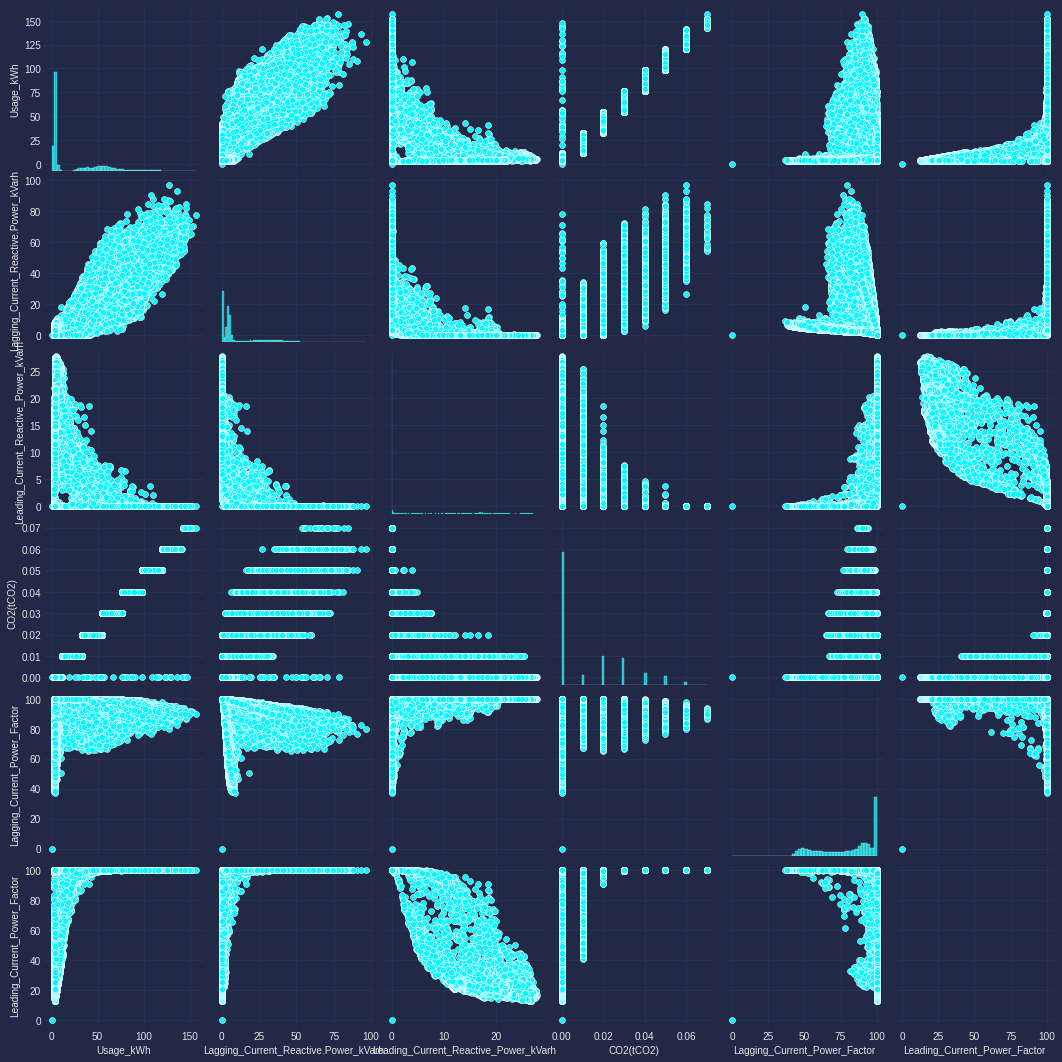

In [170]:
sns.pairplot(df_num)

In [171]:
energy_consumption = pd.pivot_table(df, index='date', values = 'Usage_kWh', aggfunc={'Usage_kWh' : np.max})
energy_consumption.head(20)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60
01/01/2018 02:00,3.60


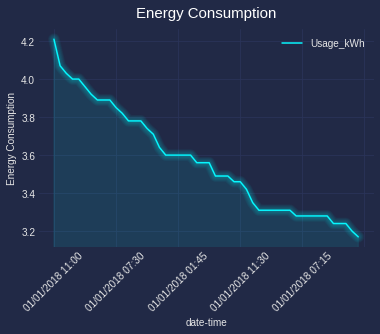

In [172]:
graph = energy_consumption[:50].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption', fontsize = 15, color = 'w', loc = 'center', pad = 12)
plt.xlabel('date-time')
plt.ylabel('Energy Consumption')
mplcyberpunk.add_glow_effects()


In [173]:
Leading_Current_Reactive_Power = pd.pivot_table(df, index='date', values = 'Leading_Current_Reactive_Power_kVarh', aggfunc={'Leading_Current_Reactive_Power_kVarh' : np.max})
Leading_Current_Reactive_Power

,Leading_Current_Reactive_Power_kVarh
date,
01/01/2018 00:00,0.00
01/01/2018 00:15,0.00
01/01/2018 00:30,0.00
01/01/2018 00:45,0.00
01/01/2018 01:00,0.00
...,...
31/12/2018 22:45,0.00
31/12/2018 23:00,0.00
31/12/2018 23:15,0.00


[]

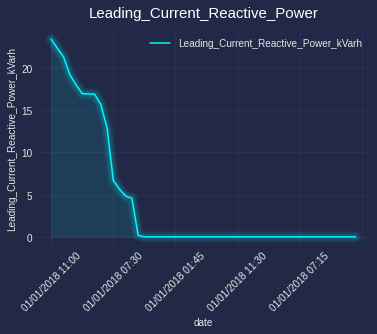

In [174]:
graph2 = Leading_Current_Reactive_Power[:50].sort_values(by = 'Leading_Current_Reactive_Power_kVarh', ascending = False).plot(kind = 'line')
graph2.set_xticklabels(graph.get_xticklabels(), rotation = 45)
plt.title('Leading_Current_Reactive_Power', fontsize = 15, color = 'w', loc = 'center', pad = 12)
plt.xlabel('date')
plt.ylabel('Leading_Current_Reactive_Power_kVarh')
mplcyberpunk.add_glow_effects()
plt.plot(figsize=(20,15))

In [175]:
Lagging_Current_Reactive_Power = pd.pivot_table(df, index='date', values = 'Lagging_Current_Reactive.Power_kVarh', aggfunc={'Lagging_Current_Reactive.Power_kVarh' : np.max})
Lagging_Current_Reactive_Power.head()

,Lagging_Current_Reactive.Power_kVarh
date,
01/01/2018 00:00,3.46
01/01/2018 00:15,2.95
01/01/2018 00:30,4.46
01/01/2018 00:45,3.28
01/01/2018 01:00,3.56


[]

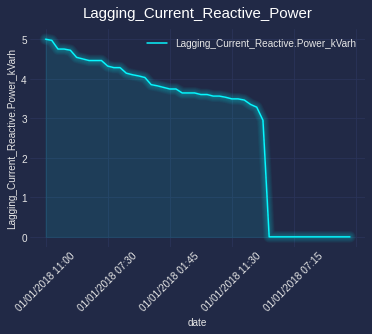

In [176]:
graph2 = Lagging_Current_Reactive_Power[:50].sort_values(by = 'Lagging_Current_Reactive.Power_kVarh', ascending = False).plot(kind = 'line')
graph2.set_xticklabels(graph.get_xticklabels(), rotation = 45)
plt.title('Lagging_Current_Reactive_Power', fontsize = 15, color = 'w', loc = 'center', pad = 12)
plt.xlabel('date')
plt.ylabel('Lagging_Current_Reactive.Power_kVarh')
mplcyberpunk.add_glow_effects()
plt.plot(figsize=(20,15))

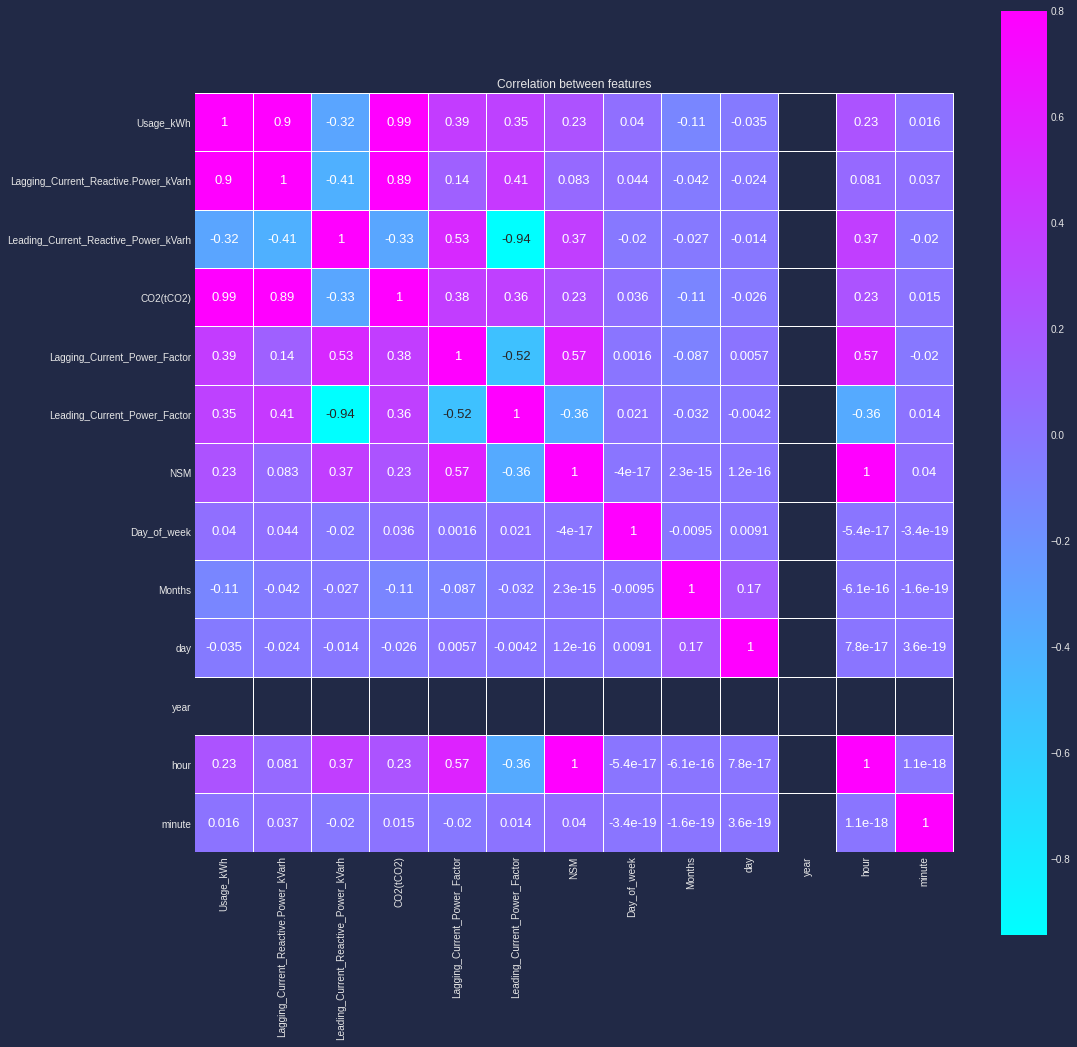

In [177]:
corr=df.corr()

plt.subplots(figsize=(17,17))
sns.heatmap(corr, vmax=.8, linewidths=0.01, cmap='cool', annot=True, annot_kws={"fontsize":13}, square=True)
plt.title('Correlation between features');

In [178]:
df.Load_Type.unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [179]:
df["Load_Type"] = le.fit_transform(df["Load_Type"]) 

In [180]:
df.Load_Type.unique()

array([0, 2, 1])

In [181]:
df.Load_Type.value_counts()

0    18072
2     9696
1     7272
Name: Load_Type, dtype: int64

In [182]:
df.WeekStatus.unique()

array(['Weekday', 'Weekend'], dtype=object)

In [183]:
df["WeekStatus"] = le.fit_transform(df["WeekStatus"])

In [184]:
df.WeekStatus.unique()

array([0, 1])

In [185]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Months,date-time,day,year,hour,minute
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0,1,2018-01-01 00:15:00,1,2018,0,15
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0,1,2018-01-01 00:30:00,1,2018,0,30
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0,1,2018-01-01 00:45:00,1,2018,0,45
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0,1,2018-01-01 01:00:00,1,2018,1,0
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1,0,1,2018-01-01 01:15:00,1,2018,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1,0,12,2018-12-31 23:00:00,31,2018,23,0
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0,12,2018-12-31 23:15:00,31,2018,23,15
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0,12,2018-12-31 23:30:00,31,2018,23,30
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1,0,12,2018-12-31 23:45:00,31,2018,23,45


In [186]:
df.drop('date', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('Day_of_week', axis=1, inplace=True)
df.drop('date-time', axis=1, inplace=True)


In [187]:
df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Load_Type,Months,day,hour,minute
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,0,1,1,0,15
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,0,1,1,0,30
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,0,1,1,0,45
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,0,1,1,1,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,0,1,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,0,12,31,23,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,0,12,31,23,15
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,0,12,31,23,30
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,0,12,31,23,45


In [188]:
X = df.drop('Usage_kWh', axis=1)
y= df.Usage_kWh

In [189]:
X_train.shape

(24528, 12)

In [190]:
y_train.shape

(24528,)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [193]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [194]:
from math import sqrt

In [195]:
rfr = RandomForestRegressor(n_estimators=200, max_depth=5, max_features='sqrt')
rfr = rfr.fit(X_train, y_train)

In [196]:
xgboost = XGBRegressor(
            nthread=4,
            learning_rate =0.1, 
            max_depth= 4,
            min_child_weight =1,
            objective ='reg:squarederror',
            subsample =0.7,
            colsample_bytree= 0.7,
            n_estimators= 20)

xgboost = xgboost.fit(X_train, y_train)

In [197]:
rfr.score(X_train, y_train)

0.9728042731726277

In [198]:
rfr.score(X_test, y_test)

0.9736250099719738

In [199]:
xgboost.score(X_train, y_train)

0.962837401932925

In [200]:
xgboost.score(X_test, y_test)

0.9624261630188043

In [201]:
y_pred=rfr.predict(X_test) 

In [202]:
y_pred

array([  3.2925853 ,  66.42286501, 105.19410138, ...,   3.29706195,
         3.23154044,   4.43735554])

In [212]:
X.drop(columns='Predictions', inplace=True)

In [213]:
y_pred_ = xgboost.predict(X.values)

In [214]:
y_pred_

array([4.097931 , 3.232919 , 4.097931 , ..., 3.2883873, 3.2883873,
       3.1661901], dtype=float32)

In [205]:
print ("RMSE rf: " + str(round(sqrt(mean_squared_error(y_test, y_pred)),2)))
print ("MAPE rf: " + str(round(mean_absolute_percentage_error(y_test, y_pred),2)*100))
print("R_squared: " + str(round(r2_score(y_test,y_pred),2)))
print ("RMSE xgb: " + str(round(sqrt(mean_squared_error(y_test, y_pred_)),2)))
print ("MAPE xgb: " + str(round(mean_absolute_percentage_error(y_test, y_pred_),2)*100))
print("R_squared: " + str(round(r2_score(y_test, y_pred_),2)))

RMSE rf: 5.44
MAPE rf: 16.0
R_squared: 0.97
RMSE xgb: 6.49
MAPE xgb: 14.000000000000002
R_squared: 0.96


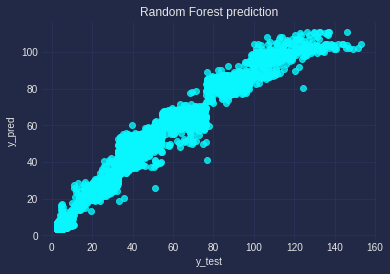

In [103]:
plt.scatter(y_test,y_pred,alpha = 0.8)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title('Random Forest prediction')
plt.show()

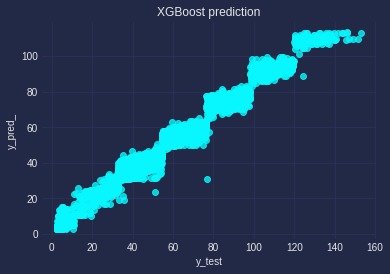

In [104]:
plt.scatter(y_test,y_pred_,alpha = 0.8)
plt.xlabel("y_test")
plt.ylabel("y_pred_")
plt.title('XGBoost prediction')
plt.show()